#CAP-DS | Assignment[Unsupervised ML II]

**Instruction**

#Task 1: Data Loading

* Load the five synthetic datasets provided. Each dataset is named synthetic_dataset_X_no_cluster.csv where x ranges from 1 to 5.
* Perform any necessary preprocessing steps, such as normalization, if required by your analysis.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

#loading all 5 datasets
df1 = pd.read_csv('synthetic_dataset_1.csv')
df2 = pd.read_csv('synthetic_dataset_2.csv')
df3 = pd.read_csv('synthetic_dataset_3.csv')
df4 = pd.read_csv('synthetic_dataset_4.csv')
df5 = pd.read_csv('synthetic_dataset_5.csv')

print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())
print(df5.head())

   Feature_1  Feature_2
0   6.505653   2.447003
1  -5.128943   9.836189
2  -6.891874  -7.777364
3  -8.327712  -8.287573
4  -7.468992  -6.030507
   Feature_1  Feature_2
0   8.322442  -6.734095
1   4.388701   7.969363
2  -2.773521   8.528901
3   5.285526   7.667699
4   7.123368  -6.979183
   Feature_1  Feature_2
0  10.040430   2.381404
1  -3.599771  -8.336816
2  -3.895151  -6.287223
3   9.540973   3.434214
4   2.340144   4.393786
   Feature_1  Feature_2
0  -1.358725   3.950166
1  -8.716583   4.145134
2  -2.997256   4.846362
3  -7.424438   5.181902
4  -0.025533   5.449861
   Feature_1  Feature_2
0   8.284906   7.776848
1  -2.948434   0.365538
2  -3.367091  -0.303440
3  -3.307619  -1.076985
4   7.270437   6.379306


In [5]:
#Getting the shape of dataset
print('Dataset 1 shape:', df1.shape)
print('Dataset 2 shape:', df2.shape)
print('Dataset 3 shape:', df3.shape)
print('Dataset 4 shape:', df4.shape)
print('Dataset 5 shape:', df5.shape)

Dataset 1 shape: (200, 2)
Dataset 2 shape: (300, 2)
Dataset 3 shape: (250, 2)
Dataset 4 shape: (150, 2)
Dataset 5 shape: (100, 2)


In [6]:
#Getting the information of dataset
print('Dataset 1 information:', df1.info())
print('Dataset 2 information:', df2.info())
print('Dataset 3 information:', df3.info())
print('Dataset 4 information:', df4.info())
print('Dataset 5 information:', df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  200 non-null    float64
 1   Feature_2  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
Dataset 1 information: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  300 non-null    float64
 1   Feature_2  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB
Dataset 2 information: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  250 non-null    float64
 1   Feature_2  250 non-null    float64
dtypes: float64(2)
memory usage: 4.0 KB
Dataset 3 information: None
<cla

In [7]:
#Getting the Null values
print('df1 null values:\n', df1.isnull().sum())
print('\ndf2 null values:\n', df2.isnull().sum())
print('\ndf3 null values:\n', df3.isnull().sum())
print('\ndf4 null values:\n', df4.isnull().sum())
print('\ndf5 null values:\n', df5.isnull().sum())

df1 null values:
 Feature_1    0
Feature_2    0
dtype: int64

df2 null values:
 Feature_1    0
Feature_2    0
dtype: int64

df3 null values:
 Feature_1    0
Feature_2    0
dtype: int64

df4 null values:
 Feature_1    0
Feature_2    0
dtype: int64

df5 null values:
 Feature_1    0
Feature_2    0
dtype: int64


In [8]:
#Getting the duplicates
print('Df1 duplicates:',df1.duplicated().sum())
print('Df2 duplicates:',df2.duplicated().sum())
print('Df3 duplicates:',df3.duplicated().sum())
print('Df4 duplicates:',df4.duplicated().sum())
print('Df5 duplicates:',df5.duplicated().sum())

Df1 duplicates: 0
Df2 duplicates: 0
Df3 duplicates: 0
Df4 duplicates: 0
Df5 duplicates: 0


* Since the data is already cleaned, we can dive straight into the preprocessing

#Preprocessing

In [9]:
print('df1 description:', df1.describe())
print('\ndf2 description:', df2.describe())
print('\ndf3 description:', df3.describe())
print('\ndf4 description:', df4.describe())
print('\ndf5 description:', df5.describe())

df1 description:         Feature_1   Feature_2
count  200.000000  200.000000
mean    -1.564904    1.443716
std      4.811213    6.549258
min     -9.003523   -8.832197
25%     -6.083157   -6.260380
50%     -2.563116    2.237789
75%      3.877668    8.388872
max      6.954537   11.477528

df2 description:         Feature_1   Feature_2
count  300.000000  300.000000
mean     2.219988    4.291091
std      4.372228    6.170521
min     -4.735753   -8.387493
25%     -1.766763    1.922360
50%      1.226369    6.857708
75%      6.322205    8.398511
max     10.329574   12.360519

df3 description:         Feature_1   Feature_2
count  250.000000  250.000000
mean    -0.720402   -0.387576
std      6.423759    6.325435
min     -9.809982  -11.365173
25%     -5.878043   -7.480643
50%     -3.314218    2.593416
75%      4.231273    5.259331
max     12.229342    8.588045

df4 description:         Feature_1   Feature_2
count  150.000000  150.000000
mean    -4.883024    5.015306
std      3.716542    1.045087

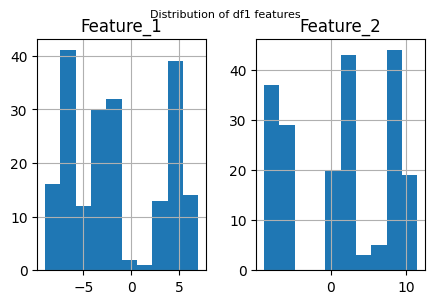

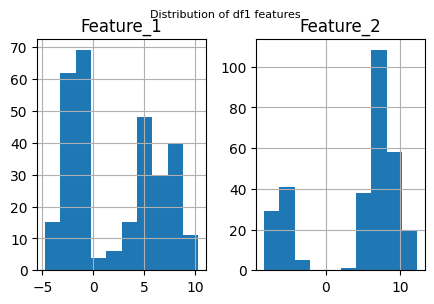

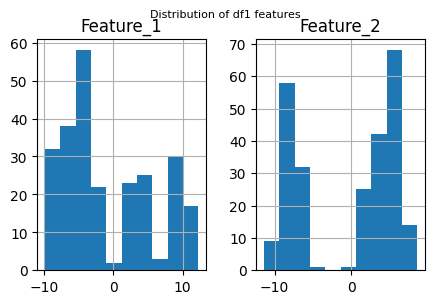

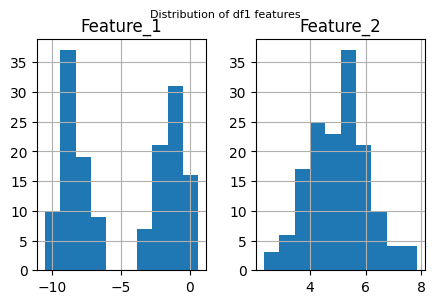

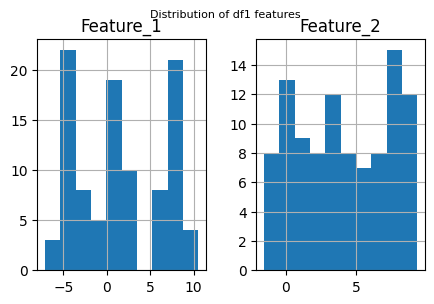

In [10]:
#Check Distribution using histogram across all datasets
df1.hist(figsize=(5, 3))
plt.suptitle("Distribution of df1 features", fontsize=8)
plt.show()

df2.hist(figsize=(5, 3))
plt.suptitle("Distribution of df1 features", fontsize=8)
plt.show()

df3.hist(figsize=(5, 3))
plt.suptitle("Distribution of df1 features", fontsize=8)
plt.show()

df4.hist(figsize=(5, 3))
plt.suptitle("Distribution of df1 features", fontsize=8)
plt.show()

df5.hist(figsize=(5, 3))
plt.suptitle("Distribution of df1 features", fontsize=8)
plt.show()

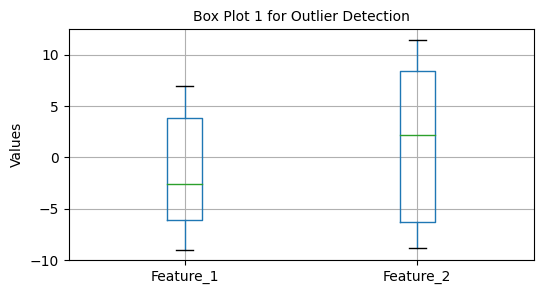

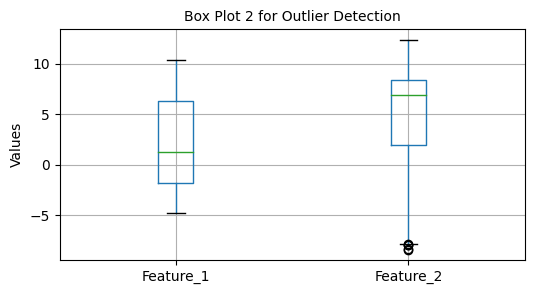

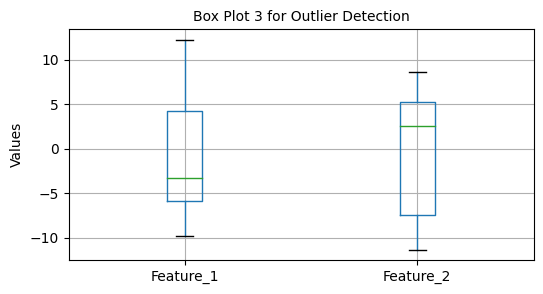

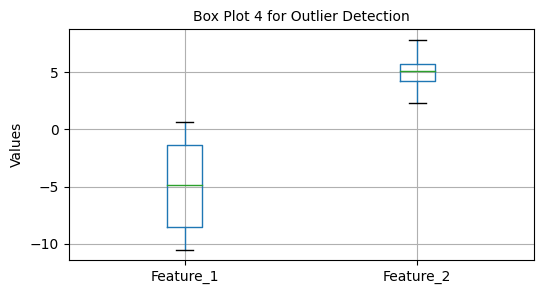

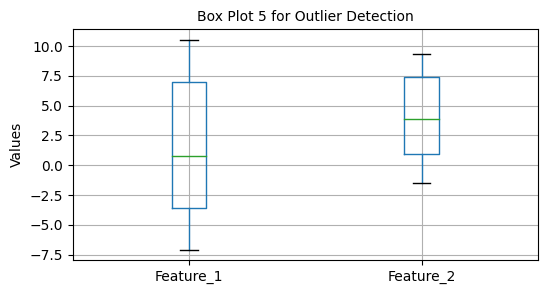

In [11]:
#Check outliers using boxplot across all datasets
plt.figure(figsize=(6, 3))
df1.boxplot()
plt.title("Box Plot 1 for Outlier Detection", fontsize=10)
plt.ylabel("Values")
plt.show()

plt.figure(figsize=(6, 3))
df2.boxplot()
plt.title("Box Plot 2 for Outlier Detection", fontsize=10)
plt.ylabel("Values")
plt.show()

plt.figure(figsize=(6, 3))
df3.boxplot()
plt.title("Box Plot 3 for Outlier Detection", fontsize=10)
plt.ylabel("Values")
plt.show()

plt.figure(figsize=(6, 3))
df4.boxplot()
plt.title("Box Plot 4 for Outlier Detection", fontsize=10)
plt.ylabel("Values")
plt.show()

plt.figure(figsize=(6, 3))
df5.boxplot()
plt.title("Box Plot 5 for Outlier Detection", fontsize=10)
plt.ylabel("Values")
plt.show()

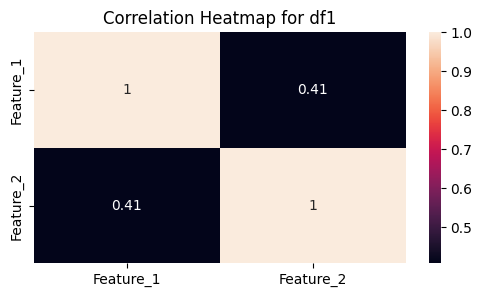

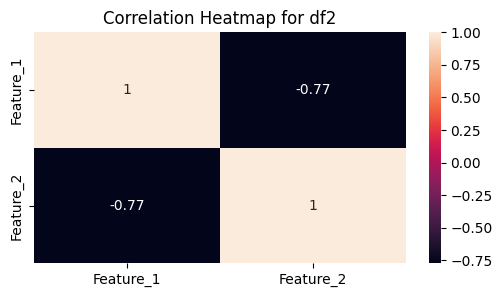

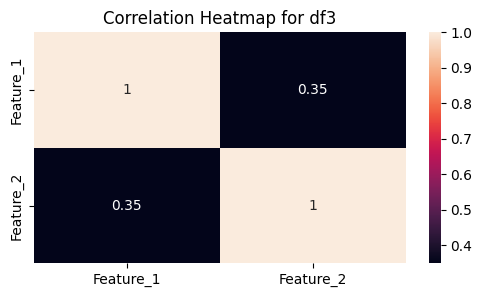

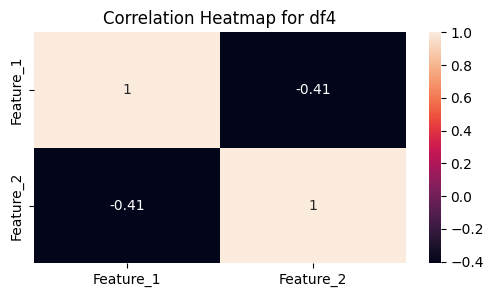

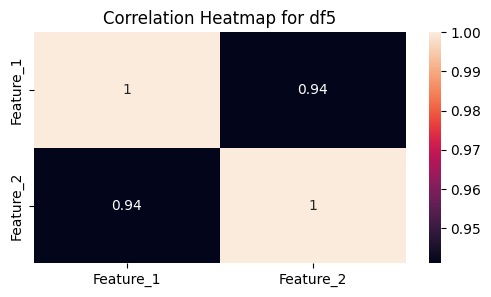

In [18]:
#check through correlation plot
datafrm = [df1, df2, df3, df4, df5]

for i, df in enumerate(datafrm):
    plt.figure(figsize=(6, 3))

    correlation_matrix = df.corr()

    #Creating heatmap
    sns.heatmap(correlation_matrix, annot=True)
    plt.title(f"Correlation Heatmap for df{i+1}")
    plt.show()

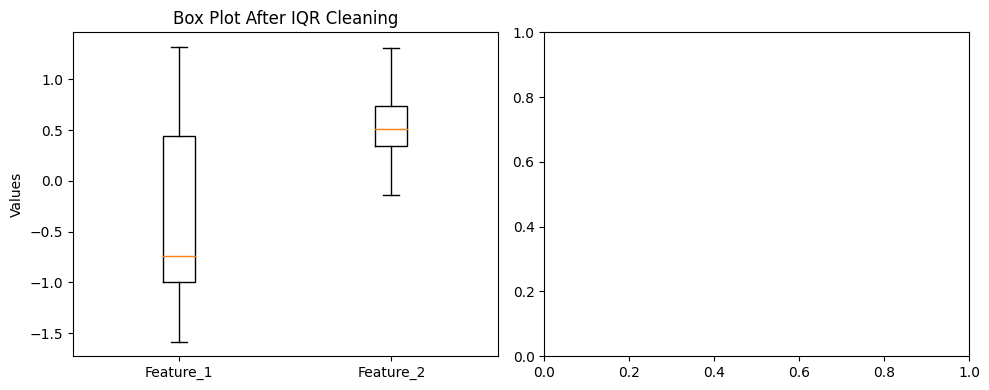

In [22]:
# Remove outliers using IQR (Interquartile Range)
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
df2 = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualize cleaned data with a boxplot after outlier removal (using either method)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot after IQR cleaning
ax[0].boxplot(df2, labels=df2.columns)
ax[0].set_title("Box Plot After IQR Cleaning")
ax[0].set_ylabel("Values")

plt.tight_layout()
plt.show()

In [20]:
# Normalize using Z-Score and overwrite existing columns
scaler = StandardScaler()
df1[['Feature_1', 'Feature_2']] = scaler.fit_transform(df1[['Feature_1', 'Feature_2']])
df2[['Feature_1', 'Feature_2']] = scaler.fit_transform(df2[['Feature_1', 'Feature_2']])
df3[['Feature_1', 'Feature_2']] = scaler.fit_transform(df3[['Feature_1', 'Feature_2']])
df4[['Feature_1', 'Feature_2']] = scaler.fit_transform(df4[['Feature_1', 'Feature_2']])
df5[['Feature_1', 'Feature_2']] = scaler.fit_transform(df5[['Feature_1', 'Feature_2']])

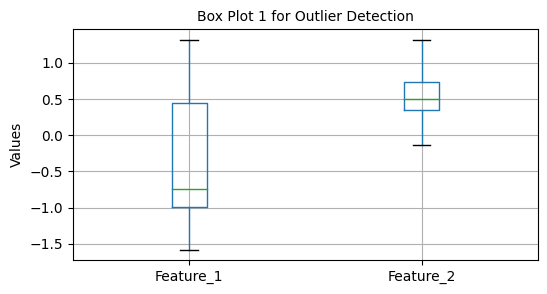

In [23]:
plt.figure(figsize=(6, 3))
df2.boxplot()
plt.title("Box Plot 1 for Outlier Detection", fontsize=10)
plt.ylabel("Values")
plt.show()

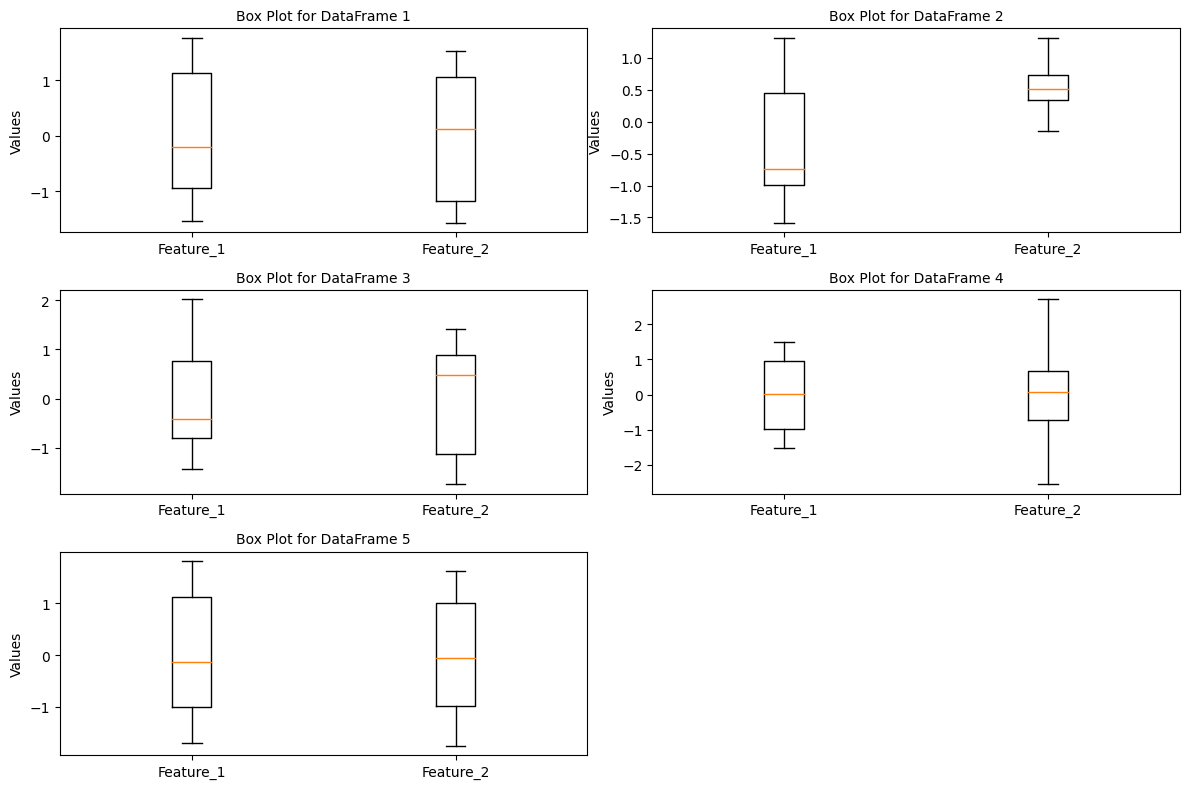

In [24]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# List of DataFrames
dataframes = [df1, df2, df3, df4, df5]

# Loop through each DataFrame and create a box plot
for i, df in enumerate(dataframes):
    axes[i].boxplot(df.values)
    axes[i].set_title(f"Box Plot for DataFrame {i + 1}", fontsize=10)
    axes[i].set_ylabel("Values")
    axes[i].set_xticklabels(df.columns)  # Set x-tick labels if necessary

# Remove any unused subplots
for j in range(len(dataframes), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* I have handled outliers which was present only in df2 dataset and also standardized each dataset.
* Now it's time to to perform [EDA]

#Task 2: Exploratory Data Analysis (EDA)

* For each dataset, plot the data points to visualize the distribution and intuitively estimate the number of clusters

* Note any observations regarding the shape, density, and separation of data points.

In [25]:
print('EDA for df1:',df1.describe())
print('\nEDA for df2:',df2.describe())
print('\nEDA for df3:',df3.describe())
print('\nEDA for df4:',df4.describe())
print('\nEDA for df5:',df5.describe())

EDA for df1:           Feature_1     Feature_2
count  2.000000e+02  2.000000e+02
mean  -6.217249e-17  8.881784e-18
std    1.002509e+00  1.002509e+00
min   -1.549980e+00 -1.572957e+00
25%   -9.414655e-01 -1.179283e+00
50%   -2.079967e-01  1.215505e-01
75%    1.134065e+00  1.063110e+00
max    1.775191e+00  1.535898e+00

EDA for df2:         Feature_1   Feature_2
count  225.000000  225.000000
mean    -0.415207    0.539882
std      0.753770    0.274684
min     -1.581650   -0.138522
25%     -0.993767    0.345059
50%     -0.738085    0.506503
75%      0.442321    0.734970
max      1.318213    1.310772

EDA for df3:           Feature_1     Feature_2
count  2.500000e+02  2.500000e+02
mean  -1.421085e-17 -3.552714e-17
std    1.002006e+00  1.002006e+00
min   -1.417832e+00 -1.738950e+00
25%   -8.045114e-01 -1.123606e+00
50%   -4.045948e-01  4.722161e-01
75%    7.723840e-01  8.945210e-01
max    2.019958e+00  1.421819e+00

EDA for df4:           Feature_1     Feature_2
count  1.500000e+02  1.500000

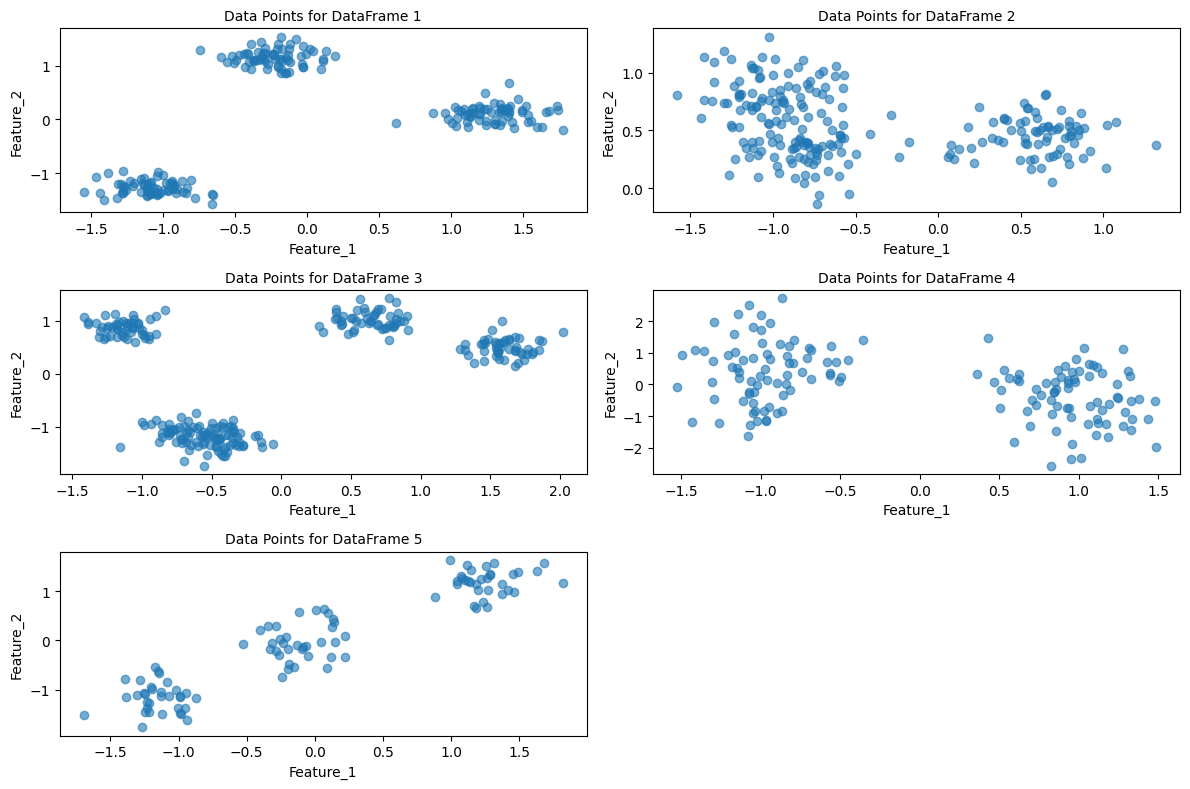

In [26]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# List of DataFrames
dataframes = [df1, df2, df3, df4, df5]

# Loop through each DataFrame and create a scatter plot
for i, df in enumerate(dataframes):
    axes[i].scatter(df['Feature_1'], df['Feature_2'], alpha=0.6)
    axes[i].set_title(f"Data Points for DataFrame {i + 1}", fontsize=10)
    axes[i].set_xlabel('Feature_1')
    axes[i].set_ylabel('Feature_2')

# Remove any unused subplots
for j in range(len(dataframes), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* **DataFrame 1:**

* **Shape:** Two clearly separated clusters are visible, with a distinct gap between them.
* **Density:** Both clusters seem to have relatively dense groupings of points.
* **Separation:** The separation between the clusters suggests two potential groups.

* **DataFrame 2:**

* **Shape:** This dataset shows more dispersed clusters with some overlap.
* **Density:** The clusters seem to have varying densities, with some areas denser than others.
* **Separation:** There are two or three possible clusters, though they overlap somewhat.

* **DataFrame 3:**

* **Shape:** Similar to DataFrame 1, there are two clear clusters of data points.
* **Shape:** Similar to DataFrame 1, there are two clear clusters of data points.
* **Separation:** The clusters are very well-separated with almost no overlap.

* **DataFrame 4:**

* **Shape:** The points are more dispersed, with a wide variation in Feature_2.
* **Density:** The density varies, and it is harder to identify tight clusters.
* **Separation:** The data points seem more blended with each other, suggesting that separating clusters might be more challenging.

* **DataFrame 5:**

* **Shape:** Similar to DataFrame 3, there are two main clusters with distinct shapes.
* **Density:** The clusters are relatively dense and well-formed.
* **Separation:** The separation is fairly clear, though not as sharp as in DataFrame 1.

#Task 3: Applying K-Means Clustering

* Apply the K-Means clustering algorithm to each dataset. Initially, you may choose a random number of clusters (k).

* Utilize the Elbow Method to determine the optimal number of clusters for each dataset. Plot the Within-Cluster- Sum-of-Squares (WCSS) against the number of clusters to identify the elbow point.

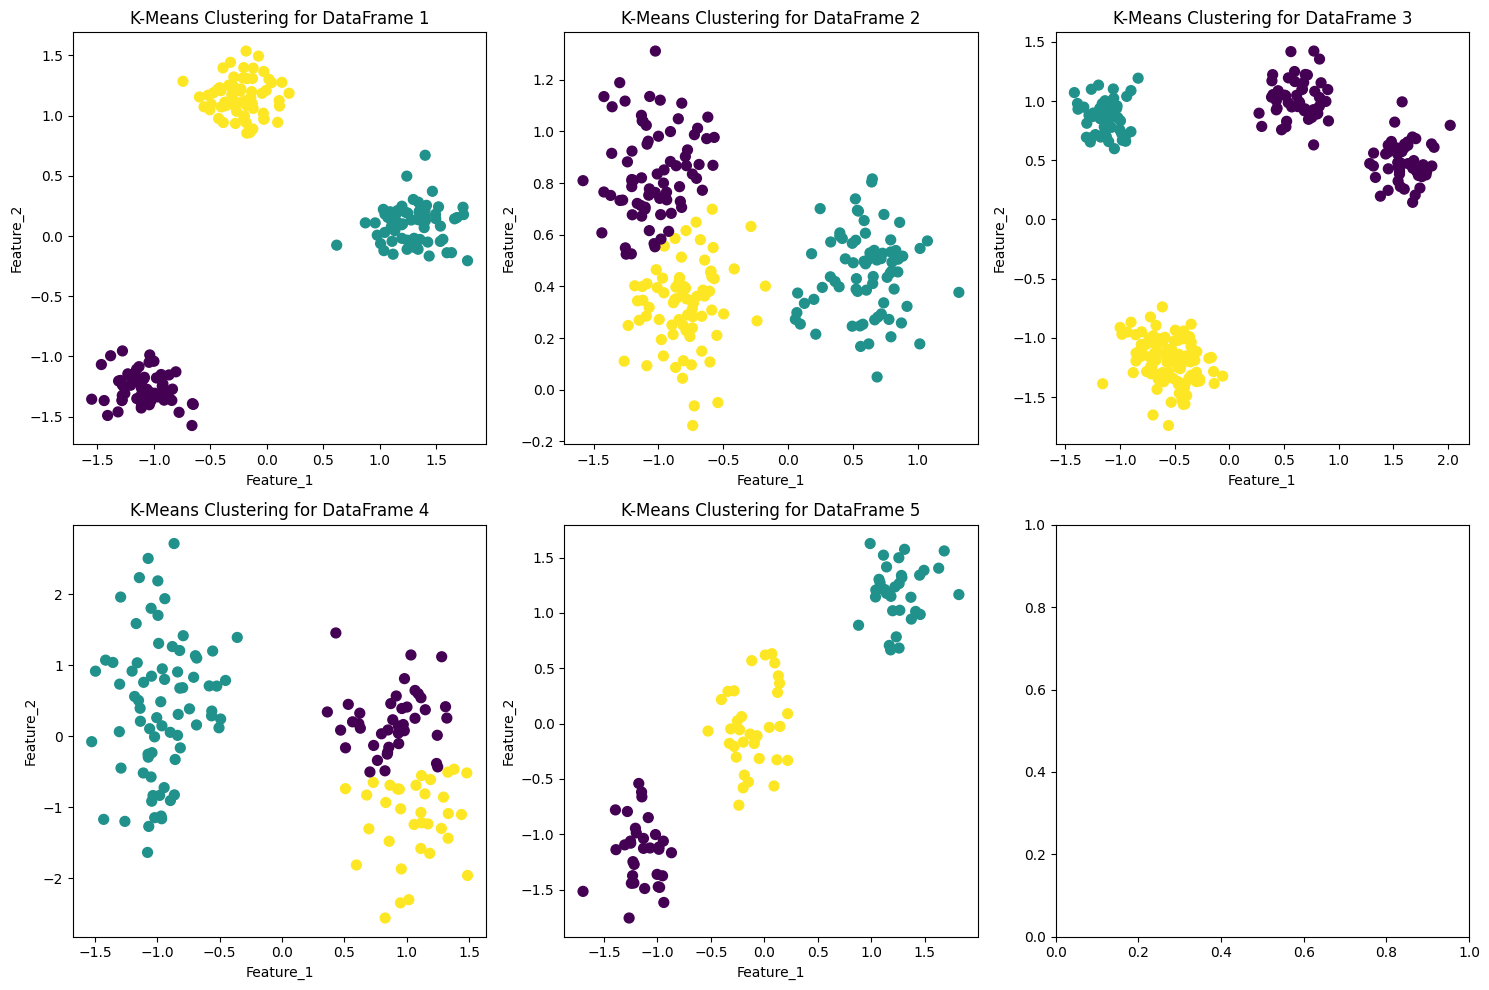

In [27]:
dataframes = [df1, df2, df3, df4, df5]

#Start with
k = 3

#K-Means clustering and visualize
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, df in enumerate(dataframes):

    kmeans = KMeans(n_clusters=k, random_state=0)

    kmeans.fit(df)

    df['Cluster'] = kmeans.labels_

    #Plotting the clusters
    axs[i].scatter(df['Feature_1'], df['Feature_2'], c=df['Cluster'], cmap='viridis', s=50)
    axs[i].set_title(f'K-Means Clustering for DataFrame {i+1}')
    axs[i].set_xlabel('Feature_1')
    axs[i].set_ylabel('Feature_2')

plt.tight_layout()
plt.show()

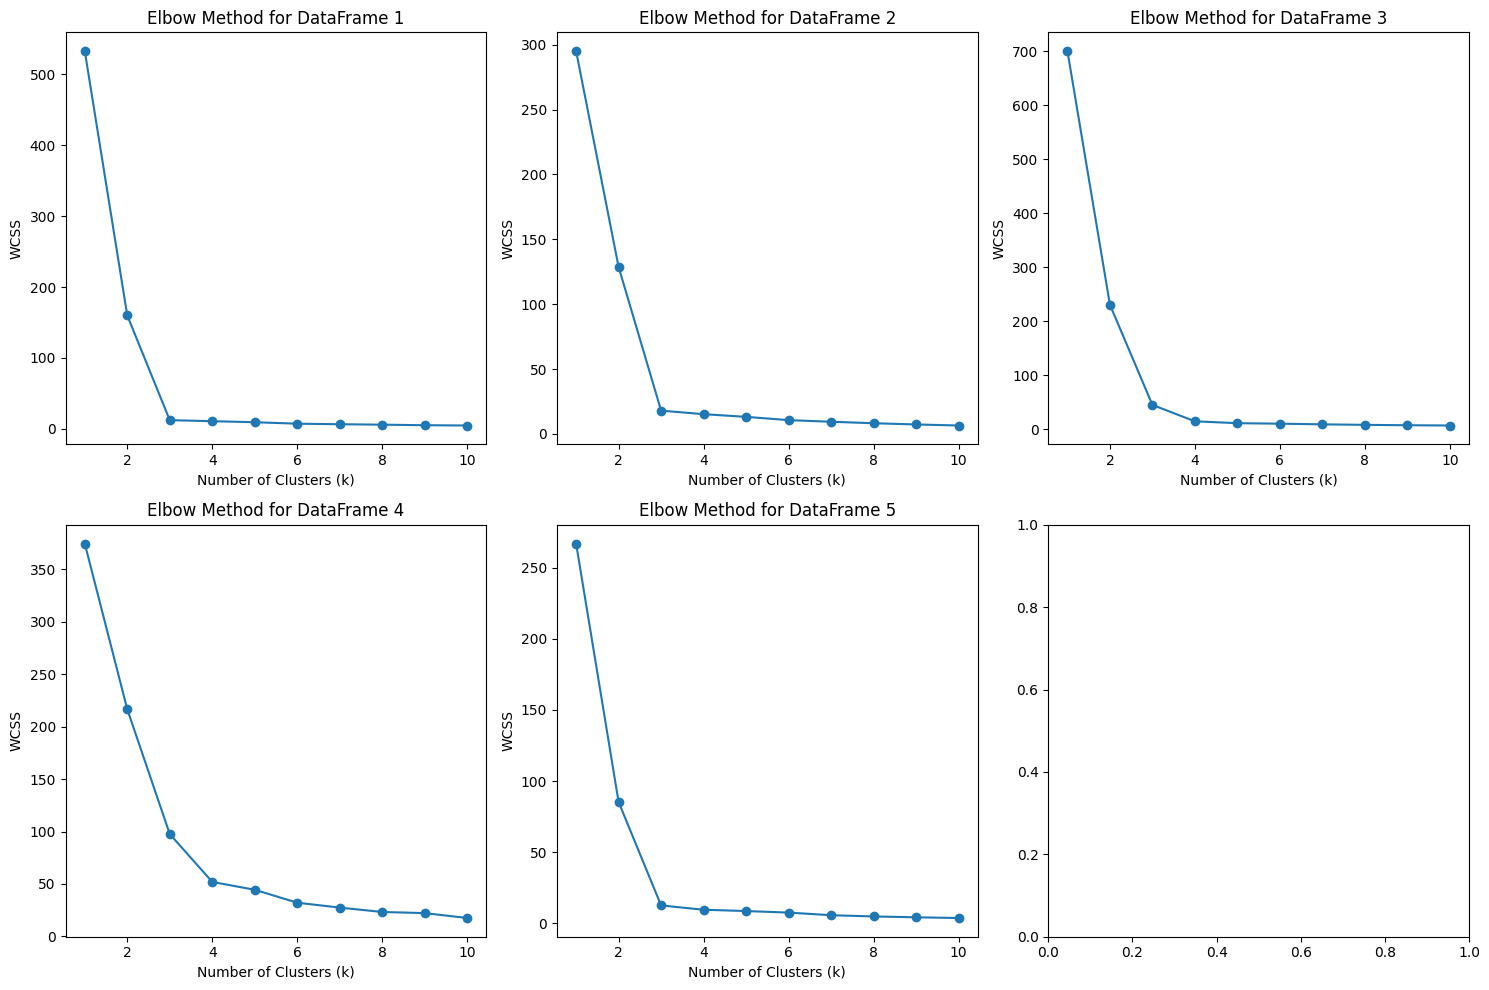

In [28]:
def calculate_wcss(df):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    return wcss

#List of datasets
dataframes = [df1, df2, df3, df4, df5]

#Plotting the Elbow
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, df in enumerate(dataframes):
    wcss = calculate_wcss(df)
    axs[i].plot(range(1, 11), wcss, marker='o')
    axs[i].set_title(f'Elbow Method for DataFrame {i+1}')
    axs[i].set_xlabel('Number of Clusters (k)')
    axs[i].set_ylabel('WCSS')

plt.tight_layout()
plt.show()

#Task 4: Cluster Visualization

* For each dataset, visualize the clustering results by plotting the data points colored by their assigned cluster. Also, mark the centroids of each cluster.

* Compare these visualizations against your initial observations during EDA.

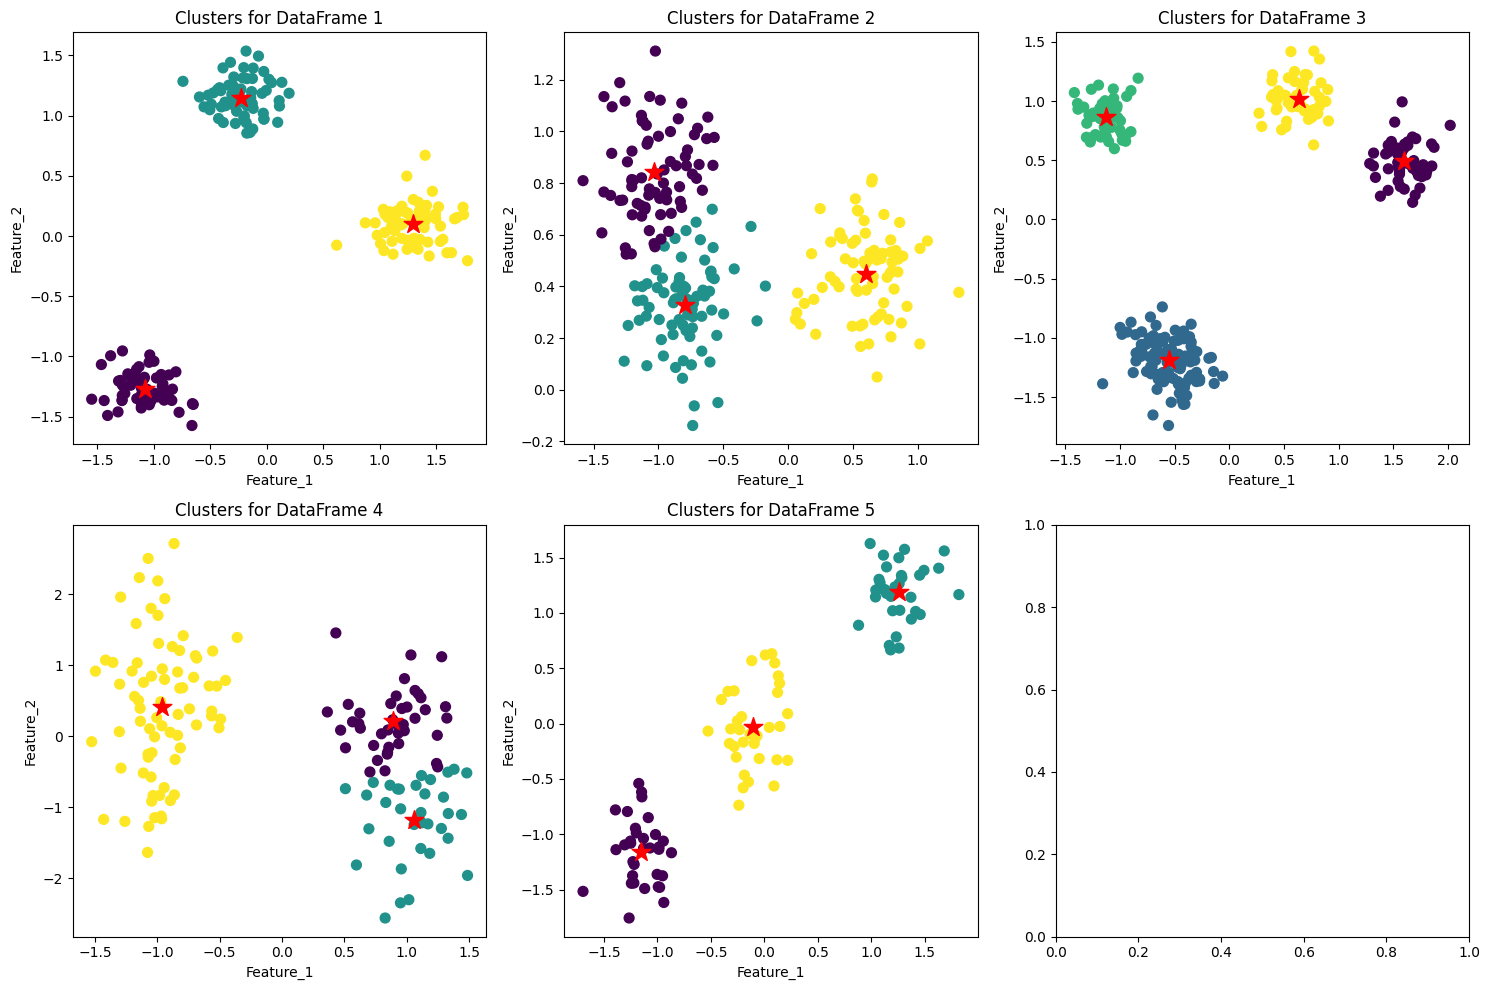

In [32]:
def plot_clusters(df, k, title, ax):
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_kmeans = kmeans.fit_predict(df)

    #Plotting the clusters
    ax.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

    #Plotting the centroids
    centroids = kmeans.cluster_centers_
    ax.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='*')

    ax.set_title(title)
    ax.set_xlabel('Feature_1')
    ax.set_ylabel('Feature_2')

#Optimal clusters for each dataset
optimal_clusters = [3, 3, 4, 3, 3]

#datasets
dataframes = [df1, df2, df3, df4, df5]

#Plotting the clustering results for each DataFrame
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, (df, k) in enumerate(zip(dataframes, optimal_clusters)):
    plot_clusters(df, k, f'Clusters for DataFrame {i+1}', axs[i])

plt.tight_layout()
plt.show()

* In dataset (df1 and df5) there were 3 clusters initially and now finally we have 3 because it was very clear.
* In (df2 and df4) initially i applied k=3 but i think some part was overlapping but now i have same no. of culsters because if i choose more cluster it would be more clutter.
* In df3 initially k=3 was not suppose to be very clear but when i put k=4 it seems pretty good now.


#Task 5: Evaluation and Discussion

* I attatched a PDF file.